In [1]:
%load_ext autoreload
%autoreload 2
#%env CUDA_VISIBLE_DEVICES=3

In [2]:
colab_requirements = [
    "pip install librosa",
    "pip install noisereduce",
    "pip install soundfile",

]

import sys, subprocess

def run_subprocess_command(cmd):
    # run the command
    process = subprocess.Popen(cmd.split(), stdout=subprocess.PIPE)
    # print the output
    for line in process.stdout:
        print(line.decode().strip())

IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    for i in colab_requirements:
        run_subprocess_command(i)

In [3]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
%matplotlib inline

In [9]:
url = "https://od.lk/s/NjlfMjUwMzgxNjhf/dataN.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
data = data

In [10]:
IPython.display.Audio(data=data, rate=rate)

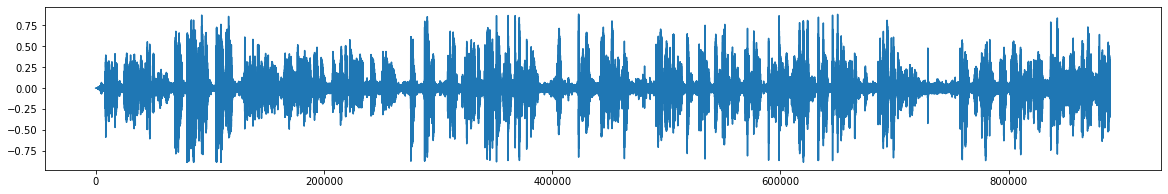

In [11]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [14]:
reduced_noise = nr.reduce_noise(y = data, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

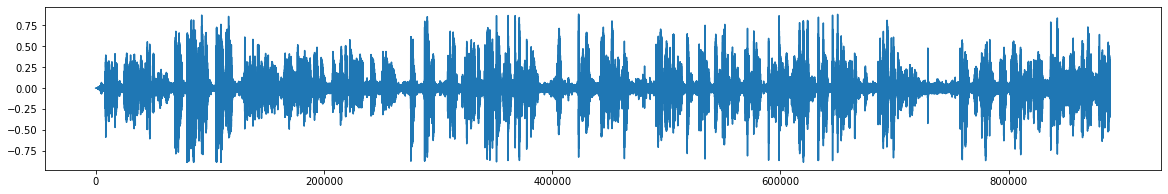

In [16]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

In [18]:
IPython.display.Audio(data=data, rate=rate)

In [19]:
reduced_noise = nr.reduce_noise(y = data, sr=rate, n_std_thresh_stationary=1.5,stationary=True)

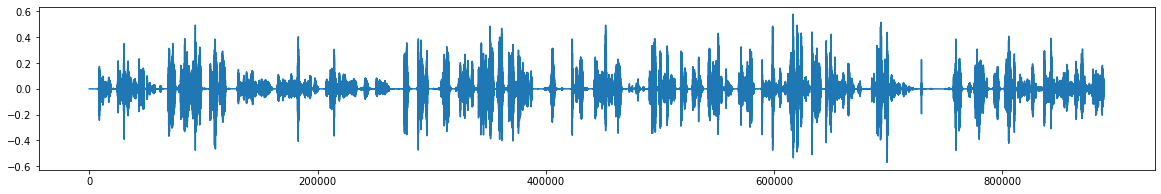

In [20]:
fig, ax = plt.subplots(figsize=(20,3))
ax.plot(reduced_noise)

In [21]:
IPython.display.Audio(data=reduced_noise, rate=rate)